In [61]:
import pandas as pd
from sklearn.decomposition import  PCA
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# from google.colab import files
# files.upload()


In [23]:
!cp train.csv /content/drive/MyDrive/


cp: cannot stat 'train.csv': No such file or directory


In [24]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [25]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df.shape


(42000, 785)

In [27]:
import matplotlib.pyplot as plt

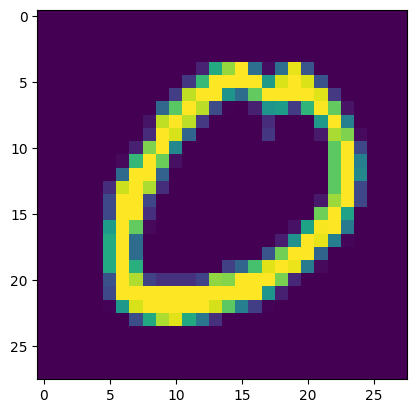

In [28]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [29]:
X = df.drop('label',axis=1)
y = df['label']

In [30]:
y

,label
0,1
1,0
2,1
3,4
4,0
...,...
41995,0
41996,1
41997,7
41998,6


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
X_train.shape

(33600, 784)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [ ]:
from sklearn.preprocessing import  StandardScaler
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)


In [ ]:
#PCA
from sklearn.decomposition import  PCA
pca = PCA(n_components=200)


In [ ]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)


In [ ]:
X_train.shape

(33600, 784)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_trf = knn.predict(X_test_trf)

In [ ]:
accuracy_score(y_test,y_pred_trf)

0.9675

In [ ]:
acc_pca = {}
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()

    knn.fit(X_train_trf,y_train)

    y_pred = knn.predict(X_test_trf)

    acc_pca[i] = accuracy_score(y_test,y_pred)
    print(accuracy_score(y_test,y_pred))


0.2730952380952381
0.42214285714285715
0.48488095238095236
0.6194047619047619
0.7297619047619047
0.8188095238095238
0.866904761904762
0.8938095238095238
0.9075
0.9247619047619048
0.9315476190476191
0.9421428571428572
0.9492857142857143
0.954047619047619
0.9544047619047619
0.9583333333333334
0.9616666666666667
0.9626190476190476
0.9644047619047619
0.9654761904761905
0.9665476190476191
0.9683333333333334
0.9694047619047619
0.9703571428571428
0.9704761904761905
0.9709523809523809
0.9708333333333333
0.9705952380952381
0.9714285714285714
0.9716666666666667
0.9725
0.9720238095238095
0.9705952380952381
0.9716666666666667
0.9710714285714286
0.9721428571428572
0.9726190476190476
0.9720238095238095
0.9729761904761904
0.9725
0.9721428571428572
0.9721428571428572
0.9726190476190476
0.9721428571428572
0.9717857142857143
0.9717857142857143
0.9727380952380953
0.9732142857142857
0.9730952380952381
0.9722619047619048
0.9730952380952381
0.9730952380952381
0.9727380952380953
0.9723809523809523
0.97226190

In [33]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [34]:
X_train_trf

array([[-226.60523462, -305.89437099],
       [  38.33583717,  461.09152047],
       [-305.49225463,  351.67141678],
       ...,
       [ -28.00133402, -596.06287179],
       [ 233.97011308,  -18.64779077],
       [1096.50373629,  254.72333173]])

In [35]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [57]:
# transforming in 3D
pca = PCA(n_components=88)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [58]:
X_train_trf

array([[-226.60523462, -305.89437099, -417.17563833, ...,  -25.38535491,
        -149.22545826,  -73.30475409],
       [  38.33583717,  461.09152047, -100.40840682, ...,  -91.93875266,
          94.8027564 ,   56.66311023],
       [-305.49225463,  351.67141678,  961.3475787 , ...,   73.21845571,
         142.68638714,   58.32082834],
       ...,
       [ -28.00133402, -596.06287179, -606.25130926, ...,   48.92063249,
           8.69471714,  -44.95912643],
       [ 233.97011308,  -18.64779077,  148.27481803, ...,   -7.71967909,
         -28.93479673,   14.184408  ],
       [1096.50373629,  254.72333173,  560.33354832, ...,   12.52619769,
         -89.37736922,   29.51241163]])

In [59]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [60]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09770722, 0.16900067, 0.2307548 , 0.28465032, 0.33357585,
       0.37694429, 0.40971003, 0.43863706, 0.46634409, 0.4896358 ,
       0.51056687, 0.53103851, 0.54811645, 0.56494851, 0.58079573,
       0.59567555, 0.60890653, 0.6217459 , 0.63357974, 0.6450916 ,
       0.65585129, 0.66609344, 0.6757597 , 0.68493267, 0.69377981,
       0.70211509, 0.7102658 , 0.71801912, 0.72543898, 0.73237223,
       0.73898072, 0.74531281, 0.75134494, 0.75723224, 0.76285054,
       0.76824915, 0.77332825, 0.77819952, 0.78291205, 0.78755761,
       0.79208251, 0.7965231 , 0.80068828, 0.80464464, 0.80848068,
       0.81221196, 0.815819  , 0.81930765, 0.82264965, 0.82582976,
       0.82897181, 0.83204415, 0.83496782, 0.83783336, 0.84062454,
       0.84331783, 0.84596712, 0.84853351, 0.85106204, 0.85351457,
       0.85592008, 0.85831105, 0.86057999, 0.86279635, 0.8649424 ,
       0.86700054, 0.86901774, 0.87098082, 0.87291702, 0.87479944,
       0.87665559, 0.87847316, 0.88022525, 0.88195105, 0.88360

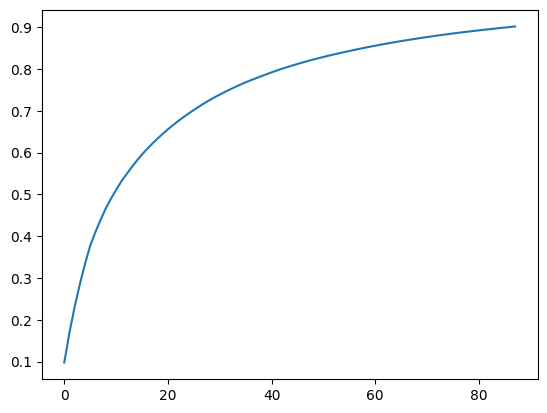

In [62]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))